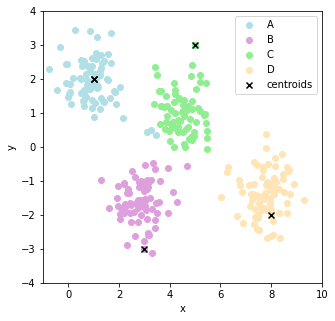

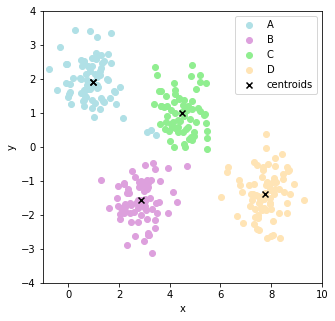

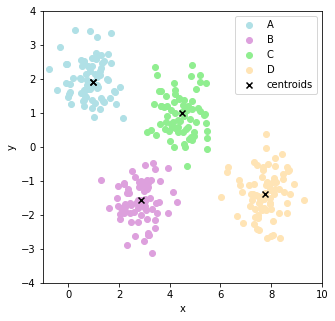

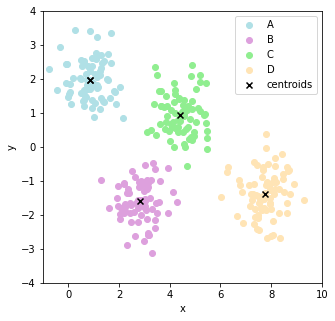

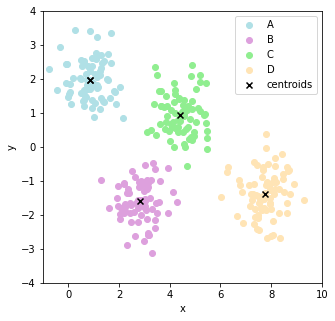

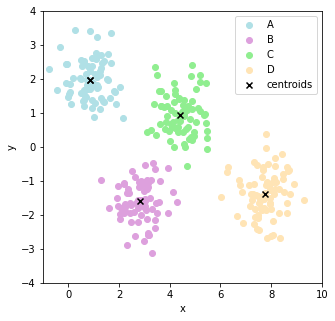

290.50434472199436

In [22]:
# problem1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


data=pd.read_csv('C:\\Users\\vivia\\Desktop\\Vivian\\datascience\\cdata.csv')
k=4
centroid,list1,list2={},[],[]
#找隨機中心點
for i in range(k):
    centroid[i]=(np.random.randint(-1,10),np.random.randint(-4,4))
df=pd.DataFrame({"centroid":centroid})
for i in range(4):
    list1.append(df['centroid'][i][0])
    list2.append(df["centroid"][i][1])
df1=pd.DataFrame({"x":list1,"y":list2})


oldcenter = df1
while True:
#分群
    distance=pd.DataFrame(columns=["centroid_0","centroid_1","centroid_2","centroid_3"],index=range(len(data)))
    #距離公式
    for j in range(len(data)):
        for i in range(len(df)):
            a=(((data['x'][j]-oldcenter["x"][i])**2 + (data['y'][j]-oldcenter["y"][i])**2))
            distance.loc[j]["centroid_{}".format(i)] = a
    #找最短距離    
    distance["min"]=distance.min(axis=1)
    b=[]
    for i in range(len(data)):
        for j in range(4):
            if distance["min"][i] == distance.loc[i]["centroid_{}".format(j)]:
                b.append(j)
    distance["closet"]=b
#畫圖(舊的中心點進行分群)
    fig = plt.figure(figsize=(5,5))
    c = {0:'powderblue',1:'plum',2:'lightgreen',3:"moccasin"}
    label = {0:'A', 1:'B', 2:'C', 3:'D'}
    for i in range(len(distance)):
        plt.scatter(data["x"][i],data["y"][i],color=c[distance["closet"][i]])
    for i in range(4):
        plt.scatter(oldcenter["x"][i],oldcenter["y"][i],color=c[i],label=label[i])
    for i in range(4):
        plt.scatter(oldcenter["x"][i],oldcenter["y"][i],marker="x",color="k")
    plt.scatter(oldcenter["x"][0],oldcenter["y"][0],marker="x",color="k",label='centroids')
    plt.xlim(-1,10)
    plt.ylim(-4,4)
    plt.legend(loc="upper right")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
#合併資料
    distance=data.join(distance)
#重新找中心點，重新平均所屬座標
    new=distance.groupby("closet").mean()
    center=new[["x","y"]]
#畫圖(新的中心點)
    fig = plt.figure(figsize=(5,5))
    c = {0:'powderblue',1:'plum',2:'lightgreen',3:"moccasin"}
    label = {0:'A', 1:'B', 2:'C', 3:'D'}
    for i in range(len(distance)):
        plt.scatter(data["x"][i],data["y"][i],color=c[distance["closet"][i]])
    for i in range(4):
        plt.scatter(center["x"][i],center["y"][i],color=c[i],label=label[i])
    for i in range(len(new)):
        plt.scatter(center["x"][i],center["y"][i],marker="x",color="k")
    plt.scatter(center["x"][0],center["y"][0],marker="x",color="k",label='centroids')
    plt.xlim(-1,10)
    plt.ylim(-4,4)
    plt.legend(loc="upper right")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    newcenter = center
#判斷中心點有沒有改變
    check = True
    for i in range(4):
        if newcenter["x"][i] != oldcenter["x"][i]:
            check = False
            break
        elif newcenter["y"][i] != oldcenter["y"][i]:
            check = False
            break
    if check == True:
        break
    else:
        oldcenter = newcenter

In [23]:
# problem2

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

data=pd.read_csv('C:\\Users\\vivia\\Desktop\\Vivian\\datascience\\cdata.csv')
listnew,r=[],[]
#設定有2~50 k群
for k in range(2,51):
    r.append(k)
    centroid,list1,list2={},[],[]
    #找隨機中心點
    for i in range(k):
        centroid[i]=(np.random.randint(-1,10),np.random.randint(-4,4))
    df=pd.DataFrame({"centroid":centroid})
    for i in range(k):
        list1.append(df['centroid'][i][0])
        list2.append(df["centroid"][i][1])
    df1=pd.DataFrame({"x":list1,"y":list2})
    oldcenter = df1
    while True:
        
    #分群
        #建立一個空白的DataFrame
        col=[]
        for i in range(k):
            s="centroid_"+str(i)
            col.append(s)
        distance=pd.DataFrame(columns=col,index=range(len(data)))
        #距離公式
        for j in range(len(data)):
            for i in range(len(df1)):
                a=(((data['x'][j]-oldcenter["x"][i])**2 + (data['y'][j]-oldcenter["y"][i])**2))
                distance.loc[j]["centroid_{}".format(i)] = a
        #找最短距離
        distance["min"]=distance.min(axis=1)
        b=[]
        for i in range(len(data)):
            for j in range(k):
                if distance["min"][i] == distance.loc[i]["centroid_{}".format(j)]:
                    b.append(j)
        distance["closet"]=b

        distance=data.join(distance)
        #重新找中心點，重新平均所屬座標
        new=distance.groupby("closet").mean()
        center=new[["x","y"]]

        newcenter = center
        #判斷中心點有沒有改變
        check = True
        for i in range(k):
            if newcenter["x"][i] != oldcenter["x"][i]:
                check = False
                break
            elif newcenter["y"][i] != oldcenter["y"][i]:
                check = False
                break
        if check == True:
            break
        else:
            oldcenter = newcenter
    #計算SSE，進行加總
    distance["min^2"]=distance["min"]*distance['min']
    listnew.append(distance['min^2'].sum())
#畫折線圖
plt.plot(r,listnew)
plt.xlabel("Number of k")
plt.ylabel("Sum of square error")
plt.show()

KeyError: 2

In [24]:
# problem3

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

data=pd.read_csv('C:\\Users\\vivia\\Desktop\\Vivian\\datascience\\cdata.csv')
listnew=[]
#進行十次隨機分群並計算SSE
for t in range(10):
    k=10
    centroid,list1,list2={},[],[]
    #找隨機中心點
    for i in range(k):
        centroid[i]=(np.random.randint(-1,10),np.random.randint(-4,4))
    df=pd.DataFrame({"centroid":centroid})
    for i in range(k):
        list1.append(df['centroid'][i][0])
        list2.append(df["centroid"][i][1])
    df1=pd.DataFrame({"x":list1,"y":list2})

    oldcenter = df1
    while True:
    #分群
        #建立一個空白的DataFrame
        col=[]
        for i in range(k):
            s="centroid_"+str(i)
            col.append(s)
        distance=pd.DataFrame(columns=col,index=range(len(data)))
        #距離公式
        for j in range(len(data)):
            for i in range(len(df1)):
                a=(((data['x'][j]-oldcenter["x"][i])**2 + (data['y'][j]-oldcenter["y"][i])**2))
                distance.loc[j]["centroid_{}".format(i)] = a
        #找最短距離
        distance["min"]=distance.min(axis=1)
        b=[]
        for i in range(len(data)):
            for j in range(k):
                if distance["min"][i] == distance.loc[i]["centroid_{}".format(j)]:
                    b.append(j)
        distance["closet"]=b

        distance=data.join(distance)
        #重新找中心點
        new=distance.groupby("closet").mean()
        center=new[["x","y"]]

        newcenter = center
        #判斷中心點有沒有改變
        check = True
        for i in range(k):
            if newcenter["x"][i] != oldcenter["x"][i]:
                check = False
                break
            elif newcenter["y"][i] != oldcenter["y"][i]:
                check = False
                break
        if check == True:
            break
        else:
            oldcenter = newcenter
    #計算SSE
    distance["min^2"]=distance["min"]*distance['min']
    listnew.append(distance['min^2'].sum())
#畫圖
labels=["0",'2','4','6','8']
plt.bar([0,1,2,3,4],listnew,tick_label = labels)
plt.xlabel("Fixed k=10")
plt.ylabel("Sum of square error")
plt.show()

ValueError: Length of values (372) does not match length of index (300)